In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-10-22 20:10:43.322322: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 20:10:43.570276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 20:10:43.574880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 20:10:47.471641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc

In [6]:
from daaf import estimator_metrics

In [7]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1726821587/1726836104/logs/*.parquet")

In [8]:
df_logs = dataproc.read_data(files)

2024-10-22 20:10:54,958	INFO worker.py:1740 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Metadata Fetch Progress 0:   0%|                                                                              …

Parquet Files Sample 0:   0%|                                                                                 …

Read progress 0:   0%|                                                                                        …

In [9]:
df_logs

,episode,exp_id,meta,state_values,method
0,990,1726821587-21b840ef-ABCSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-62.38473431795828, -57.893917238232035, -48...",OP/OT
1,990,1726821587-2254cc65-RedGreenSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-25.86085290433757, -20.250514343849584, -16...",PP/nTD-SU
2,990,1726821587-04f7bf9a-ABCSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-53.60551642990765, -51.4935817493364, -41.9...",PP/LEAST
3,990,1726821587-0507c0a7-IceWorld,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-35.681611557425725, -35.04424679205454, -35...",PP/FR
4,990,1726821587-15400276-RedGreenSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-19.99905073604775, -17.97932123818952, -15....",PP/LEAST
...,...,...,...,...,...
191995,2070,1726821587-e6fee995-IceWorld,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","[[-74.13333333333331, -74.73787599754469, -72....",PP/LEAST
191996,2070,1726821587-e6466ca2-IceWorld,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-139.34779864785156, -136.62189048544238, -1...",PP/DMR
191997,2070,1726821587-e608c03d-TowerOfHanoi,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","[[-97.2945799153621, -93.4193206879249, -89.01...",PP/LEAST
191998,2070,1726821587-fd16e07c-TowerOfHanoi,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-2093.2026275281783, -1795.0428249931097, -1...",OP/OT


In [10]:
df_logs.iloc[0]["meta"]

{'algorithm': 'one-step-td',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-48.99999993, -41.99999999, -35.        , -28.        ,
        -21.        , -14.        ,  -7.        ,   0.        ]),
 'env': {'args': '{"length": 7, "distance_penalty": false}',
  'level': 'n=7',
  'name': 'ABCSeq',
  '_level': '7'},
 'epsilon': 0.0,
 'exp_id': '1726821587-21b840ef-ABCSeq',
 'learning_rate': 0.1,
 'policy_type': 'OP',
 'reward_period': 4,
 'run_id': 1,
 'traj_mapping_method': 'OT'}

In [11]:
df_logs.iloc[0]["state_values"]

array([array([-62.38473432, -57.89391724, -48.40994031, -41.93988829,
              -36.82012224, -33.00358336, -33.35413741,   0.        ]),
       array([-70.21600194, -64.05622633, -59.23307837, -54.43573262,
              -48.10336585, -37.65105584, -39.33444675,   0.        ]),
       array([-59.31433658, -53.6538727 , -50.5297967 , -44.29168706,
              -39.00348638, -33.22616021, -34.11424269,   0.        ]),
       array([-64.4761011 , -55.82896246, -46.97910587, -39.72116391,
              -32.28467785, -25.51095978, -20.26832619,   0.        ]),
       array([-69.59847322, -61.45655243, -54.78226728, -44.16563635,
              -36.41240245, -27.19048432, -18.00215805,   0.        ]),
       array([-61.54400074, -53.34351252, -46.98489461, -43.8664305 ,
              -38.36243059, -28.31403682, -21.84773079,   0.        ]),
       array([-59.78711475, -51.53655656, -46.78929235, -41.40451792,
              -37.24107973, -33.87089113, -26.02184843,   0.        ]),
      

In [12]:
def isolate_problem(df, problem: str, level: str, algo: str, gamma: float, reward_period: int):
    def filter_methods(meta): 
        return (
            (meta["env"]["name"] == problem) &
            (meta["env"]["level"] == level) &
            (meta["algorithm"] == algo) &
            (meta["discount_factor"] == gamma) &
            (meta["reward_period"] == reward_period)
        )
    def filter_baseline(meta):
        return (
            (meta["env"]["name"] == problem) &
            (meta["env"]["level"] == level) &
            (meta["algorithm"] == algo) &
            (meta["discount_factor"] == gamma) &
            (meta["traj_mapping_method"] == "identity-mapper") &
            (meta["reward_period"] == 1)
        )
    df_raw = pd.concat(
        [
            copy.deepcopy(df[df["meta"].apply(filter_methods)]),
            copy.deepcopy(df[df["meta"].apply(filter_baseline)])
        ],
        axis=0
    )

    rows = []
    for row in df_raw.to_dict("records"):
        new_row = copy.deepcopy(row)
        del new_row["meta"]
        new_row = dict(new_row, **row["meta"])
        rows.append(new_row)
    df_raw = pd.DataFrame(rows)
    del df_raw["env"]
    exp_columns = [
        col for col in df_raw.columns if col not in set(["state_values", "dyna_prog_state_values"])
    ]
    return df_raw.drop_duplicates(
        subset=exp_columns,
    ).sort_values(["episode", "exp_id"])
    

In [13]:
def plots_value_changes(df_problem: pd.DataFrame):
    # plot per state and traj mapper
    rows = []
    df_ref = copy.deepcopy(df_problem)
    
    for row in df_ref.to_dict("records"):
        state_values = np.stack(row["state_values"])
        # shape: (runs x states)
        num_runs, _ = state_values.shape
        # new_row = copy.deepcopy(row)
        for run in range(num_runs):
            rows.extend(
                [
                    {**row, "run": run, "state": state, "state_value": value}
                    for state, value in enumerate(state_values[run])
                ]
            )

    df_methods = pd.DataFrame(rows)
    ref_row = copy.deepcopy(df_methods.iloc[0]).to_dict()
    episodes = df_methods["episode"].unique()
    runs = df_methods["run"].unique()
    
    for episode in episodes:
        for run in runs:
            rows.extend(
                [
                    {**ref_row, "episode": episode, "run": run, 
                     "state": state, "state_value": value,
                    "traj_mapping_method": "dynamic-programming"}
                    for state, value in enumerate(ref_row["dyna_prog_state_values"])
                ]
            )
            
    df_plot = pd.DataFrame(rows)

    palette = sns.color_palette("tab10")
    return sns.relplot(
        data=df_plot,
        x="episode", y="state_value",
        hue="traj_mapping_method", col="state",
        kind="line", palette=palette,
        height=5, aspect=.75, facet_kws=dict(sharex=False),
    )

## One-step TD

In [14]:
df_abc_td = isolate_problem(
    df_logs, problem="ABCSeq", level="n=7",
    algo="one-step-td",
    reward_period=4,
    gamma=1.0
)

In [15]:
df_abc_td

,episode,exp_id,state_values,method,algorithm,algorithm_args,discount_factor,drop_truncated_feedback_episodes,dyna_prog_state_values,epsilon,learning_rate,policy_type,reward_period,run_id,traj_mapping_method
126,0,1726821587-1ea78f43-ABCSeq,"[[-0.36, -0.36, -1.08, -1.08, 0.0, -0.4, -0.36...",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,0,LEAST
124,0,1726821587-21b840ef-ABCSeq,"[[-0.4, 0.0, -0.4, -0.4, -1.12, -0.4, -1.6, 0....",OP/OT,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,OP,4,0,OT
125,0,1726821587-2c44d7d4-ABCSeq,"[[0.0, -0.76, -1.08, 0.0, -1.44, -0.36, -1.480...",PP/IMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,IMR
127,0,1726821587-73d209a3-ABCSeq,"[[0.0, -0.76, 0.0, -0.8, -0.4, -0.4, -0.4, 0.0...",PP/DMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,DMR
630,10,1726821587-1ea78f43-ABCSeq,"[[-5.32313996368, -6.18825221716, -6.524410501...",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,5,LEAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2480,1726821587-73d209a3-ABCSeq,"[[-182.56377883692443, -155.14354656423944, -1...",PP/DMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,13,DMR
922,2490,1726821587-1ea78f43-ABCSeq,"[[-45.99478030246791, -38.75632803206125, -31....",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,9,LEAST
920,2490,1726821587-21b840ef-ABCSeq,"[[-66.92386938335389, -60.87563408620904, -57....",OP/OT,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,OP,4,9,OT
921,2490,1726821587-2c44d7d4-ABCSeq,"[[-45.47058454401428, -40.75236931873213, -30....",PP/IMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,IMR


In [16]:
df_abc_td.shape

(1000, 15)

In [17]:
df_abc_td

,episode,exp_id,state_values,method,algorithm,algorithm_args,discount_factor,drop_truncated_feedback_episodes,dyna_prog_state_values,epsilon,learning_rate,policy_type,reward_period,run_id,traj_mapping_method
126,0,1726821587-1ea78f43-ABCSeq,"[[-0.36, -0.36, -1.08, -1.08, 0.0, -0.4, -0.36...",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,0,LEAST
124,0,1726821587-21b840ef-ABCSeq,"[[-0.4, 0.0, -0.4, -0.4, -1.12, -0.4, -1.6, 0....",OP/OT,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,OP,4,0,OT
125,0,1726821587-2c44d7d4-ABCSeq,"[[0.0, -0.76, -1.08, 0.0, -1.44, -0.36, -1.480...",PP/IMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,IMR
127,0,1726821587-73d209a3-ABCSeq,"[[0.0, -0.76, 0.0, -0.8, -0.4, -0.4, -0.4, 0.0...",PP/DMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,DMR
630,10,1726821587-1ea78f43-ABCSeq,"[[-5.32313996368, -6.18825221716, -6.524410501...",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,5,LEAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2480,1726821587-73d209a3-ABCSeq,"[[-182.56377883692443, -155.14354656423944, -1...",PP/DMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,13,DMR
922,2490,1726821587-1ea78f43-ABCSeq,"[[-45.99478030246791, -38.75632803206125, -31....",PP/LEAST,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,9,LEAST
920,2490,1726821587-21b840ef-ABCSeq,"[[-66.92386938335389, -60.87563408620904, -57....",OP/OT,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,OP,4,9,OT
921,2490,1726821587-2c44d7d4-ABCSeq,"[[-45.47058454401428, -40.75236931873213, -30....",PP/IMR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,4,7,IMR


In [18]:
df_abc_td["traj_mapping_method"].unique()

array(['LEAST', 'OT', 'IMR', 'DMR'], dtype=object)

In [19]:
df_abc_td["state_values"].iloc[0].shape

(20,)

/tmp/ipykernel_3114566/2457586796.py:38: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  return sns.relplot(


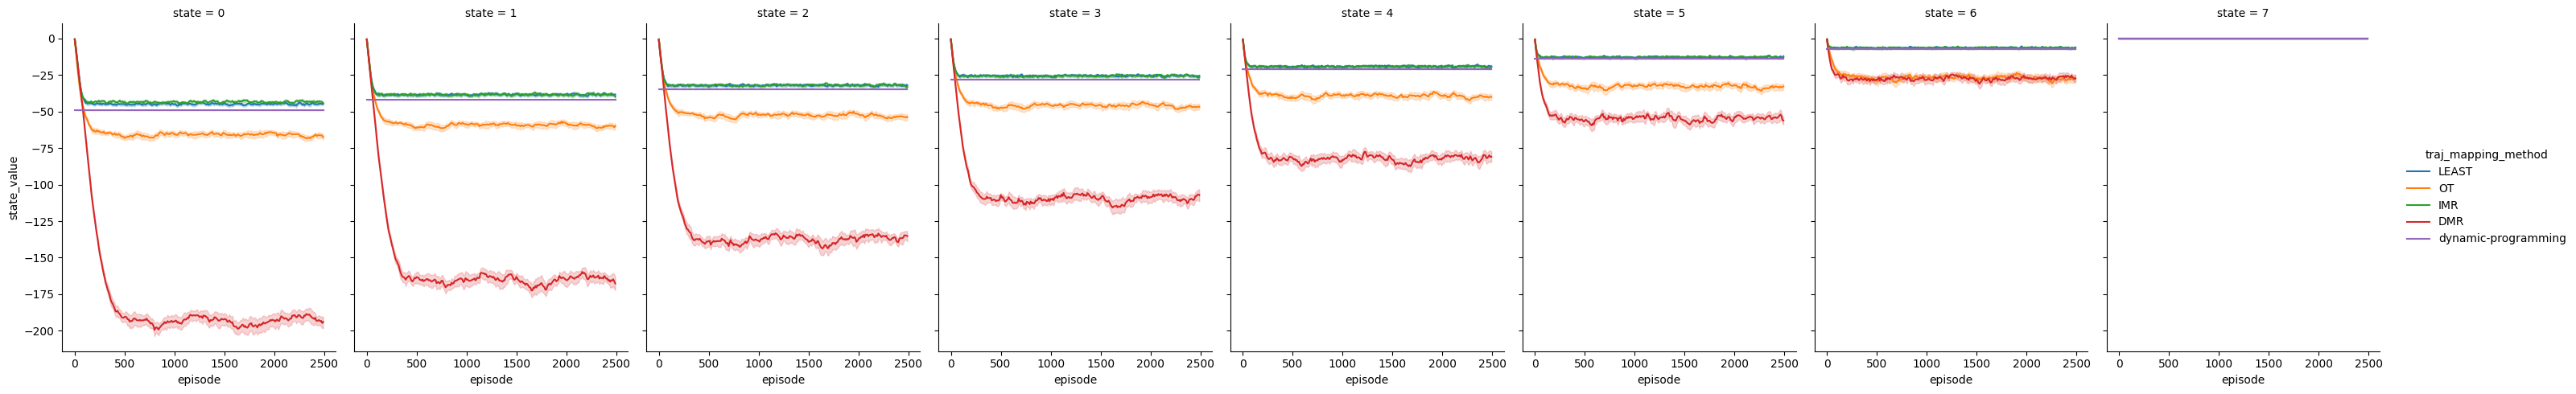

In [20]:
plots_value_changes(df_abc_td)

## Monte Carlo

In [21]:
df_abc_mc = isolate_problem(
    df_logs, problem="ABCSeq", level="n=7",
    algo="first-visit-mc",
    reward_period=4,
    gamma=1.0
)

In [22]:
df_abc_mc["traj_mapping_method"].unique()

array(['DMR', 'LEAST', 'IMR', 'OT'], dtype=object)

/tmp/ipykernel_3114566/2457586796.py:38: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  return sns.relplot(


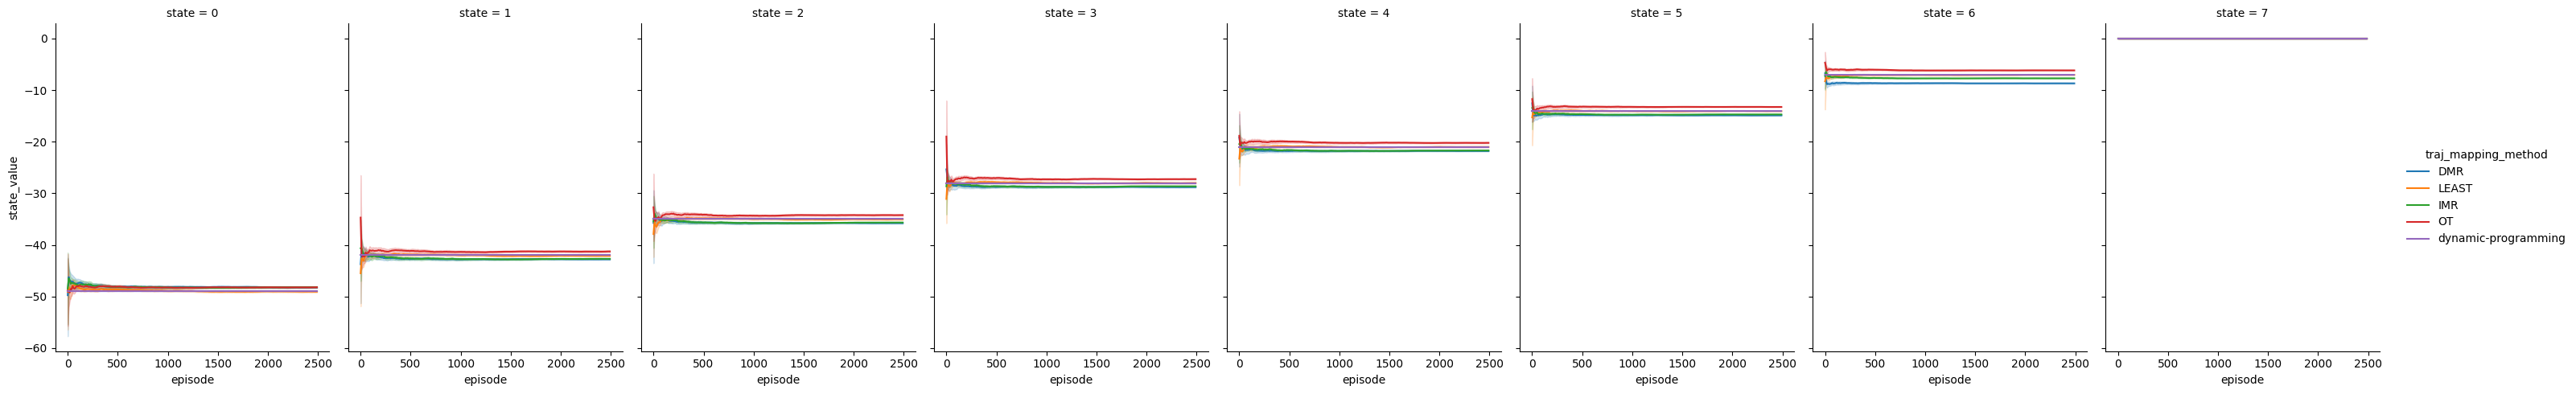

In [23]:
plots_value_changes(df_abc_mc)

## Full Rewards

In [24]:
df_fr = isolate_problem(
    df_logs, problem="ABCSeq", level="n=7",
    algo="one-step-td",
    reward_period=1,
    gamma=1.0
)

In [25]:
df_fr

,episode,exp_id,state_values,method,algorithm,algorithm_args,discount_factor,drop_truncated_feedback_episodes,dyna_prog_state_values,epsilon,learning_rate,policy_type,reward_period,run_id,traj_mapping_method
31,0,1726821587-74818508-ABCSeq,"[[-0.37000000000000005, -0.1, -0.3700000000000...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,0,FR
157,10,1726821587-74818508-ABCSeq,"[[-8.10481282220499, -8.441783053979991, -7.75...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,5,FR
243,20,1726821587-74818508-ABCSeq,"[[-13.263838468341735, -15.149045449201608, -1...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,3,FR
172,30,1726821587-74818508-ABCSeq,"[[-21.37771271226704, -20.82920026250384, -19....",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,13,FR
91,40,1726821587-74818508-ABCSeq,"[[-27.699128593575917, -25.629846225256244, -2...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,5,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2450,1726821587-74818508-ABCSeq,"[[-53.88400977444208, -44.773783195429914, -34...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,14,FR
221,2460,1726821587-74818508-ABCSeq,"[[-43.45472354381776, -34.5372137401518, -30.6...",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,7,FR
101,2470,1726821587-74818508-ABCSeq,"[[-45.73286567267412, -39.93073384516813, -30....",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,5,FR
56,2480,1726821587-74818508-ABCSeq,"[[-45.24511475426608, -41.35581741781331, -31....",PP/FR,one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,PP,1,1,FR


In [26]:
df_fr.iloc[0]["state_values"]

array([array([-0.37, -0.1 , -0.37, -0.37, -0.1 , -0.46, -0.37,  0.  ]),
       array([-0.73, -0.46, -0.28, -0.19, -0.73, -0.46, -0.19,  0.  ]),
       array([-0.46, -0.19, -1.54, -0.73, -0.1 , -0.46, -0.91,  0.  ]),
       array([-0.64, -0.46, -0.37, -0.28, -0.1 , -0.28, -0.37,  0.  ]),
       array([-0.1 , -0.19, -0.37, -0.37, -1.09, -1.18, -0.28,  0.  ]),
       array([-1.18, -0.46, -0.19, -0.28, -0.28, -1.18, -0.46,  0.  ]),
       array([-0.28, -0.1 , -0.19, -1.18, -0.19, -0.19, -0.1 ,  0.  ]),
       array([-0.55, -0.37, -0.19, -0.91, -0.73, -0.19, -1.54,  0.  ]),
       array([-0.1 , -0.64, -0.64, -0.1 , -0.19, -0.19, -0.91,  0.  ]),
       array([-1.54, -0.19, -0.55, -0.1 , -0.28, -0.1 , -0.1 ,  0.  ]),
       array([-0.19, -0.1 , -1.09, -1.  , -0.19, -0.91, -0.37,  0.  ]),
       array([-0.28, -0.37, -0.19, -0.73, -0.37, -0.19, -0.46,  0.  ]),
       array([-0.28, -0.1 , -0.28, -0.37, -0.91, -1.54, -0.55,  0.  ]),
       array([-0.37, -0.1 , -0.19, -0.1 , -0.37, -1.  , -0.1 ,  

/tmp/ipykernel_3114566/2457586796.py:38: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  return sns.relplot(


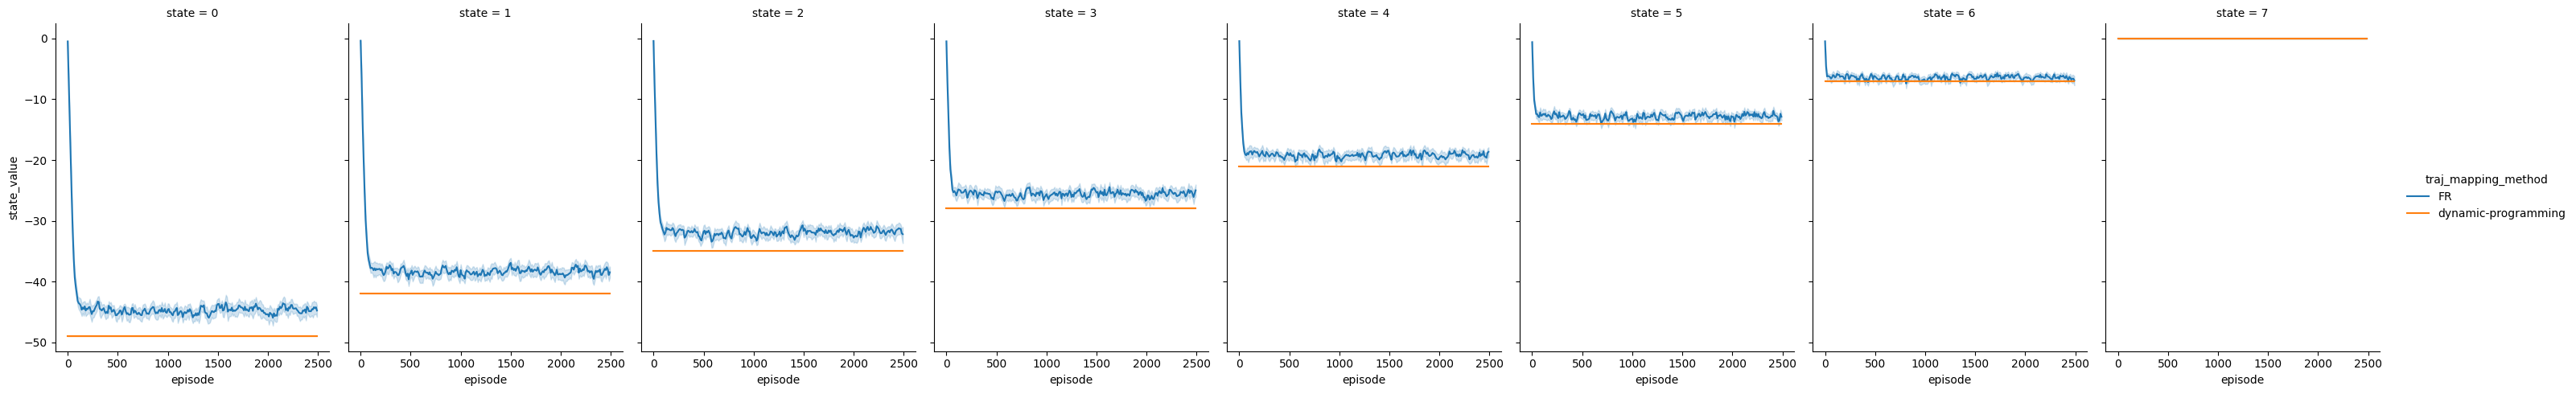

In [27]:
plots_value_changes(df_fr)